In [1]:
#This notebook demonstrates effect of Dimensionality reduction on the Efficiency of the in-built classifiers from scikit learn's library  with regards to
#(a) Various synthetic dataset
#(b) Varipous Dimensionality reduction algorithums

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_moons, make_circles, make_classification
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.datasets import make_blobs
from sklearn.pipeline import make_pipeline
from sklearn.decomposition import TruncatedSVD
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
import pandas as pd

In [18]:
names = ["Nearest Neighbors", "Linear SVM", "RBF SVM","Random Forest"]
j = 1

classifiers = [
    KNeighborsClassifier(3),
    SVC(kernel="linear", C=0.025),
    SVC(gamma=2, C=1),
    RandomForestClassifier(n_estimators=100, bootstrap = True ,max_features = 'sqrt')]

classifiers_PCAd2 = [
    make_pipeline(PCA(n_components=2), KNeighborsClassifier(n_neighbors=3)),
    make_pipeline(PCA(n_components=2), SVC(kernel="linear", C=0.025)),
    make_pipeline(PCA(n_components=2), SVC(gamma=2, C=1)),
    make_pipeline(PCA(n_components=2), RandomForestClassifier(n_estimators=100, bootstrap = True ,max_features = 'sqrt'))]

classifiers_PCAd10 = [
    make_pipeline(PCA(n_components=10), KNeighborsClassifier(n_neighbors=3)),
    make_pipeline(PCA(n_components=10), SVC(kernel="linear", C=0.025)),
    make_pipeline(PCA(n_components=10), SVC(gamma=2, C=1)),
    make_pipeline(PCA(n_components=10), RandomForestClassifier(n_estimators=100, bootstrap = True ,max_features = 'sqrt'))]

classifiers_PCA100 = [
    make_pipeline(PCA(n_components=100), KNeighborsClassifier(n_neighbors=3)),
    make_pipeline(PCA(n_components=100), SVC(kernel="linear", C=0.025)),
    make_pipeline(PCA(n_components=100), SVC(gamma=2, C=1)),
    make_pipeline(PCA(n_components=100), RandomForestClassifier(n_estimators=100, bootstrap = True ,max_features = 'sqrt'))]

classifiers_dim = [
        make_pipeline(PCA(n_components=j), KNeighborsClassifier(n_neighbors=3))]
#         make_pipeline(PCA(n_components=j), SVC(kernel="linear", C=0.025)),
#         make_pipeline(PCA(n_components=j), SVC(gamma=2, C=1)),
#         make_pipeline(PCA(n_components=j), RandomForestClassifier(n_estimators=100, bootstrap = True ,max_features = 'sqrt'))]


In [4]:
datasets = [make_moons(n_samples=1000, shuffle=True, noise=0.1, random_state=None),
           make_circles(n_samples=1000, shuffle=True, noise=0.1, random_state=None, factor=0.6),
            make_blobs(n_samples=1000, n_features=2, centers=4, cluster_std=1.0, 
                   center_box=(-5.0, 5.0), shuffle=True, random_state=None)]
df = []
for i in range (len(datasets)):
    df1 = pd.DataFrame(datasets[i][0],columns=['x'+str(i) for i in range(1,3)])
    df.append(df1)    

In [5]:
gauss_noise = (np.random.rand(1000, 1000))

gauss_noise.shape

(1000, 1000)

In [6]:
df_noise = (pd.DataFrame(gauss_noise, columns=['dim'+ str(i) for i in range(1,1000+1)]))


In [7]:
#Concatination of dataset with noise
dataset_noise = []
for i in range(3):
    dataset_noise.append(pd.concat([df[i], df_noise],axis = 1))  

In [8]:
dataset_noise[0]['y'] = datasets[0][1]
dataset_noise[1]['y'] = datasets[1][1]
dataset_noise[2]['y'] = datasets[2][1]


In [9]:
score_a = []
scorePCAd2_a = []
scorePCAd10_a = []
scorePCAd100_a = []

i = 1
# iterate over datasets
for ds_cnt, ds in enumerate(dataset_noise):
    # preprocess dataset, split into training and test part
    X = ds.iloc[:, :-1].values
    Y = dataset_noise[ds_cnt]['y']
    X = StandardScaler().fit_transform(X)
    X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=.4, random_state=42)


    # iterate over classifiers
    for name, clf in zip(names, classifiers):
        clf.fit(X_train, y_train)
        score = clf.score(X_test, y_test)
        score_a.append(score)
        
    for name, clf in zip(names, classifiers_PCAd2):
        clf.fit(X_train, y_train)
        scorePCAd2 = clf.score(X_test, y_test)
        scorePCAd2_a.append(scorePCAd2)
        
    for name, clf in zip(names, classifiers_PCAd10):
        clf.fit(X_train, y_train)
        scorePCAd10 = clf.score(X_test, y_test)
        scorePCAd10_a.append(scorePCAd10)
        
    for name, clf in zip(names, classifiers_PCA100):
        clf.fit(X_train, y_train)
        scorePCAd100 = clf.score(X_test, y_test)
        scorePCAd100_a.append(scorePCAd100)


In [10]:
Final_PCAd100 = []
Final_PCAd10 = []
Final_PCAd2 = []

for i in range(12):
    F = (scorePCAd2_a[i] - score_a[i])
    Final_PCAd2.append(F)
    
for i in range(12):
    F = (scorePCAd10_a[i] - score_a[i])
    Final_PCAd10.append(F)

for i in range(12):
    F = (scorePCAd100_a[i] - score_a[i])
    Final_PCAd100.append(F)
    


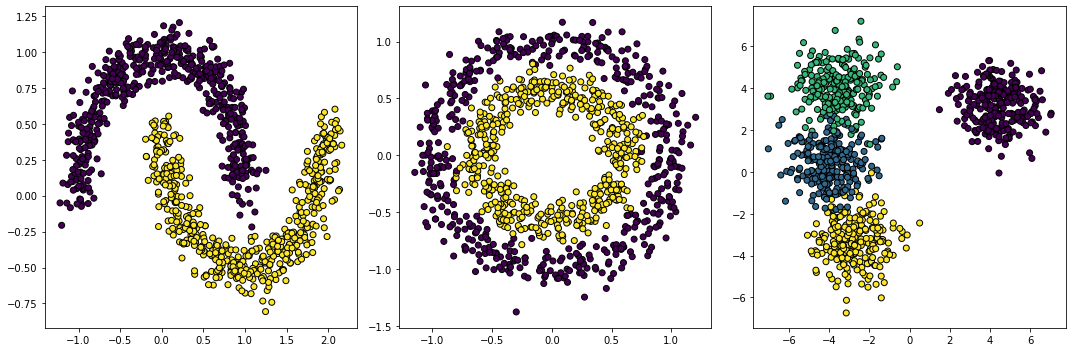

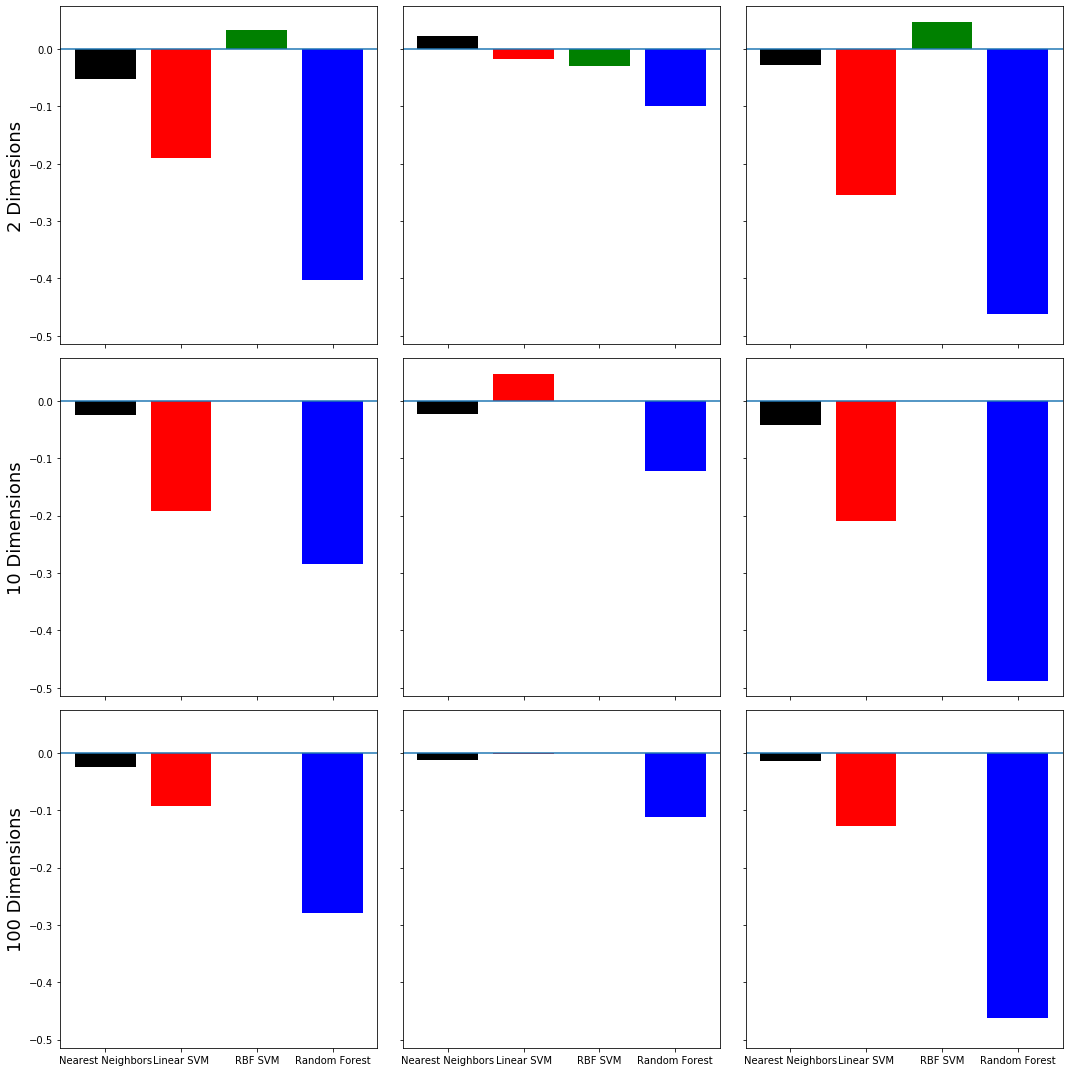

In [11]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches


fig1, axs11 = plt.subplots(1, 3, figsize=((15,5)) )
(ax1, ax2, ax3) = axs11
ax1.scatter(dataset_noise[0]['x1'], dataset_noise[0]['x2'], c= dataset_noise[0]['y'], edgecolors='k')
ax2.scatter(dataset_noise[1]['x1'], dataset_noise[1]['x2'], c=dataset_noise[1]['y'], edgecolors='k')
ax3.scatter(dataset_noise[2]['x1'], dataset_noise[2]['x2'], c=dataset_noise[2]['y'], edgecolors='k')

plt.tight_layout()
plt.show()

fig2, axs12 = plt.subplots(3, 3, figsize=((15,15)) ,squeeze=True, sharex=True, sharey=True )
(ax1, ax2, ax3), (ax4, ax5, ax6), (ax7, ax8, ax9) = axs12
fig1.suptitle('Final', fontsize=18)
ax1.bar(["Nearest Neighbors", "Linear SVM", "RBF SVM","Random Forest"], [Final_PCAd2[0],Final_PCAd2[1],Final_PCAd2[2],Final_PCAd2[3]], color=['black', 'red', 'green', 'blue'])
ax1.set_ylabel('2 Dimesions', fontsize=18)
ax1.axhline(y=0, xmin=-1, xmax=1)
ax2.bar(["Nearest Neighbors", "Linear SVM", "RBF SVM","Random Forest"], [Final_PCAd2[4],Final_PCAd2[5],Final_PCAd2[6],Final_PCAd2[7]], color=['black', 'red', 'green', 'blue'] )
ax2.axhline(y=0, xmin=-1, xmax=1)
ax3.bar(["Nearest Neighbors", "Linear SVM", "RBF SVM","Random Forest"], [Final_PCAd2[8],Final_PCAd2[9],Final_PCAd2[10],Final_PCAd2[11]], color=['black', 'red', 'green', 'blue'])
ax3.axhline(y=0, xmin=-1, xmax=1)
ax4.bar(["Nearest Neighbors", "Linear SVM", "RBF SVM","Random Forest"], [Final_PCAd10[0],Final_PCAd10[1],Final_PCAd10[2],Final_PCAd10[3]], color=['black', 'red', 'green', 'blue'])
ax4.set_ylabel('10 Dimensions', fontsize=18)
ax4.axhline(y=0, xmin=-1, xmax=1)
ax5.bar(["Nearest Neighbors", "Linear SVM", "RBF SVM","Random Forest"], [Final_PCAd10[4],Final_PCAd10[5],Final_PCAd10[6],Final_PCAd10[7]], color=['black', 'red', 'green', 'blue'])
ax5.axhline(y=0, xmin=-1, xmax=1)
ax6.bar(["Nearest Neighbors", "Linear SVM", "RBF SVM","Random Forest"], [Final_PCAd10[8],Final_PCAd10[9],Final_PCAd10[10],Final_PCAd10[11]], color=['black', 'red', 'green', 'blue'])
ax6.axhline(y=0, xmin=-1, xmax=1)
ax7.bar(["Nearest Neighbors", "Linear SVM", "RBF SVM","Random Forest"], [Final_PCAd100[0],Final_PCAd100[1],Final_PCAd100[2],Final_PCAd100[3]], color=['black', 'red', 'green', 'blue'])
ax7.set_ylabel('100 Dimensions', fontsize=18)
ax7.axhline(y=0, xmin=-1, xmax=1)
ax8.bar(["Nearest Neighbors", "Linear SVM", "RBF SVM","Random Forest"], [Final_PCAd100[4],Final_PCAd100[5],Final_PCAd100[6],Final_PCAd100[7]], color=['black', 'red', 'green', 'blue'])
ax8.axhline(y=0, xmin=-1, xmax=1)
ax9.bar(["Nearest Neighbors", "Linear SVM", "RBF SVM","Random Forest"], [Final_PCAd100[8],Final_PCAd100[9],Final_PCAd100[10],Final_PCAd100[11]], color=['black', 'red', 'green', 'blue'])
ax9.axhline(y=0, xmin=-1, xmax=1)



# red_patch = mpatches.Patch(color=['red', 'green', 'blue', 'black'], label=["Linear SVM", "RBF SVM","Random Forest","Nearest Neighbors"])
# ax1.legend(handles=[red_patch],loc=2)
plt.tight_layout()
plt.show()

In [22]:
Final_dim = []

i = 1
# iterate over datasets
for ds_cnt1, ds1 in enumerate(dataset_noise):
    X = ds1.iloc[:, :-1].values
    Y = dataset_noise[ds_cnt1]['y']
    X = StandardScaler().fit_transform(X)
    X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=.4, random_state=42)
    for name, clf in zip(names, classifiers_dim):
        for j in range (500, 2, -100):
            clf.fit(X_train, y_train)
            score_dim = clf.score(X_test, y_test)
            Final_dim.append(score_dim)


In [23]:
len(Final_dim)

15

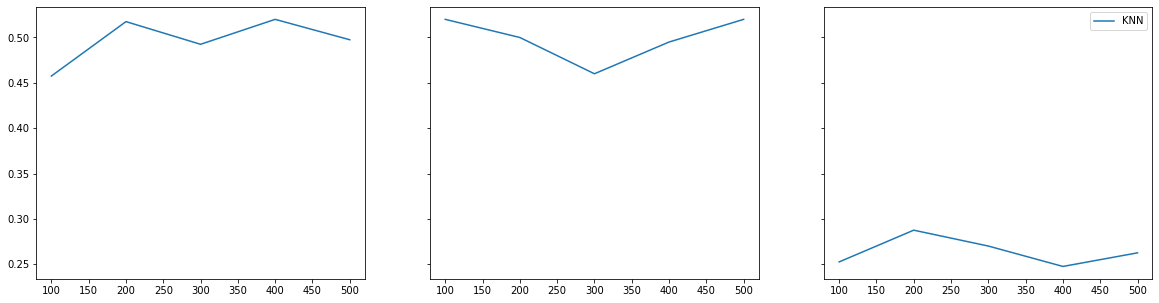

In [25]:
Xaxis = []
for j in range (500, 2, -100):
    Xaxis.append(j)
    
fig5, axs5 = plt.subplots(1, 3, figsize=((20,5)) ,squeeze=True, sharex=True, sharey=True )
(ax10, ax11, ax12) = axs5
# multiple line plot
ax10.plot( Xaxis,Final_dim[0:5], label="KNN")
ax11.plot( Xaxis,Final_dim[5:10], label="KNN")
ax12.plot( Xaxis,Final_dim[10:15], label="KNN")

# ax10.plot( Xaxis,Final_dim[75:100], label = 'Linear SVM')
# ax11.plot( Xaxis,Final_dim[100:125], label = 'Linear SVM')
# ax12.plot( Xaxis,Final_dim[125:150], label = 'Linear SVM')

# ax10.plot( Xaxis,Final_dim[150:175], label = 'RBF SVM')
# ax11.plot( Xaxis,Final_dim[175:200], label = 'RBF SVM')
# ax12.plot( Xaxis,Final_dim[200:225], label = 'RBF SVM')

# ax10.plot( Xaxis,Final_dim[225:250],  label = 'Random Forest')
# ax11.plot( Xaxis,Final_dim[250:275], label = 'Random Forest')
# ax12.plot( Xaxis,Final_dim[275:300], label = 'Random Forest')

ax10.set_ylabel = ('Accuracy')
ax10.set_xlabel = ('Number of Dimensions')
ax11.set_xlabel = ('Number of Dimensions')
ax12.set_xlabel = ('Number of Dimensions')
plt.legend()
plt.show()

In [137]:
len(Final_dim)

300